Import the ImageDataGenerator library

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Configure ImageDataGenerator Class

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

Apply Image DataGenerator Functionality To Trainset And Testset

In [4]:
x_train = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Project/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=32,color_mode='rgb',class_mode='categorical')
x_test = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Project/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=32,color_mode='rgb',class_mode='categorical')

Found 3838 images belonging to 5 classes.
Found 280 images belonging to 5 classes.


In [5]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [6]:
print(x_test.class_indices)

{'APPLE': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [9]:
from collections import Counter as c 
c(x_train .labels)

Counter({0: 913, 1: 1306, 2: 964, 3: 240, 4: 415})

In [10]:
from collections import Counter as c 
c(x_test .labels)

Counter({0: 82, 1: 48, 2: 55, 3: 35, 4: 60})

Importing The Model Building Libraries

In [11]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

Initializing The Model

In [12]:
model=Sequential()

Adding CNN Layers

In [13]:
classifier = Sequential()
classifier.add(Conv2D(32,(3, 3), input_shape=(64, 64, 3),activation='relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

Adding Dense Layers

In [15]:
classifier.add(Dense (units=128, activation='relu'))
classifier.add(Dense (units=5, activation='softmax'))

In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

Configure The Learning Process

In [17]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', 
                   metrics=['accuracy'])

Train The Model

In [18]:
classifier.fit_generator(
    generator=x_train,steps_per_epoch = len(x_train), 
    epochs=20,validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
120/120 [==============================] - 1251s 10s/step - loss: 0.8456 - accuracy: 0.6647 - val_loss: 0.3243 - val_accuracy: 0.8893
Epoch 2/20
120/120 [==============================] - 30s 249ms/step - loss: 0.5028 - accuracy: 0.8189 - val_loss: 0.2528 - val_accuracy: 0.9250
Epoch 3/20
120/120 [==============================] - 32s 262ms/step - loss: 0.4244 - accuracy: 0.8424 - val_loss: 0.2740 - val_accuracy: 0.8929
Epoch 4/20
120/120 [==============================] - 32s 262ms/step - loss: 0.3783 - accuracy: 0.8603 - val_loss: 0.2347 - val_accuracy: 0.9214
Epoch 5/20
120/120 [==============================] - 30s 246ms/step - loss: 0.3574 - accuracy: 0.8650 - val_loss: 0.3277 - val_accuracy: 0.8679
Epoch 6/20
120/120 [==============================] - 30s 248ms/step - loss: 0.3395 - accuracy: 0.8697 - val_loss: 0.2300 - val_accuracy: 0.9286
Epoch 7/20
120/120 [==============================] - 31s 259ms/step - loss: 0.3226 - accuracy: 0.8747 - val_loss: 0.2109 - val_ac

Save The Model

In [21]:
classifier.save('nutrition.h5')

Test The Model

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = load_model("nutrition.h5")

In [33]:
img = image.load_img('/content/drive/MyDrive/Project/Dataset/TEST_SET/ORANGE/n07749192_122.jpg',target_size=(64,64)) 
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
op = ['APPLE', 'BANANA', 'ORANGE', 'PINAPPLE', 'WATERMELON'] 
op[pred]

1/1 [==============================] - 0s 152ms/step


'ORANGE'

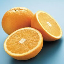

In [34]:
img

In [35]:
classes=['APPLE', 'BANANA', 'ORANGE', 'PINAPPLE', 'WATERMELON'] 
def testing(img):
  img=image.load_img(img,target_size=(64,64))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  pred=np.argmax(model.predict(x))
  return print("Predicted class as:",classes[pred])

def img_show(img):
  img1=image.load_img(img,target_size=(64,64))
  plt.imshow(img1)

1/1 [==============================] - 0s 22ms/step
Predicted class as: PINAPPLE


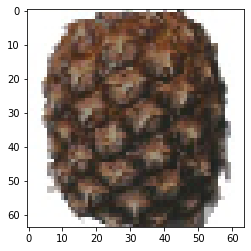

In [36]:
#test1
img_show('/content/drive/MyDrive/Project/Dataset/TEST_SET/PINEAPPLE/2_100.jpg')
testing('/content/drive/MyDrive/Project/Dataset/TEST_SET/PINEAPPLE/2_100.jpg')

1/1 [==============================] - 0s 21ms/step
Predicted class as: BANANA


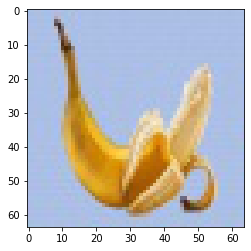

In [37]:
#test2
img_show('/content/drive/MyDrive/Project/Dataset/TEST_SET/BANANA/0SYXUU89Y8VZ.jpg')
testing('/content/drive/MyDrive/Project/Dataset/TEST_SET/BANANA/0SYXUU89Y8VZ.jpg')